In [1]:
from IPython.display import Image

# Implementing a perceptron learning algorithm in Python

The code below shows an object-oriented implementation of a perceptron classifier in Python. Take a minute to read over the code and understand what it is saying.

In [2]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Training a perceptron model on the Iris dataset

In [3]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,sepal_len,sepal_width,petal_len,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plotting the Iris data

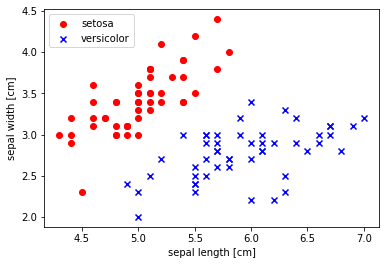

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and sepal width
X = df.iloc[0:100][["sepal_len", "sepal_width"]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('sepal width [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Training the perceptron model

# Deliverable: 2.1.1

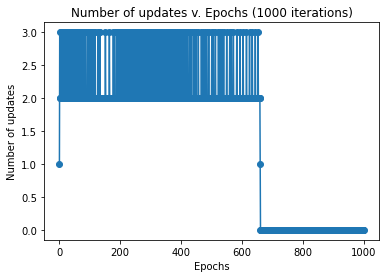

In [5]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Number of updates v. Epochs (1000 iterations)")

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

<br>
<br>

### A function for plotting decision regions

In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
    

# Deliverables: 2.1.2

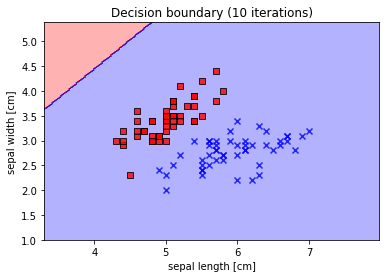

In [7]:
def decision_plot_new(X, y, iters):
    ppn = Perceptron(eta=0.1, n_iter=iters)
    ppn.fit(X, y)
    plot_decision_regions(X, y, classifier=ppn)
    plt.title("Decision boundary (" + str(iters) + " iterations)")
    plt.ylabel("sepal width [cm]")
    plt.xlabel("sepal length [cm]")

decision_plot_new(X, y, 10)


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

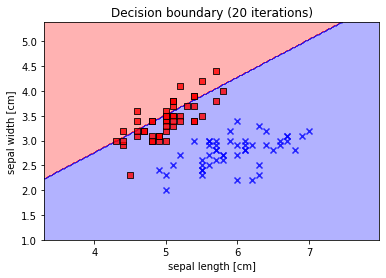

In [8]:
decision_plot_new(X, y, 20)

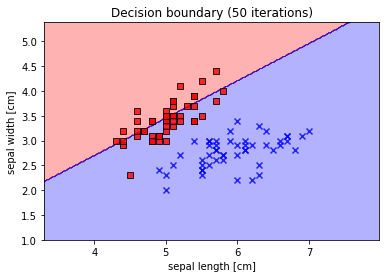

In [9]:
decision_plot_new(X, y, 50)

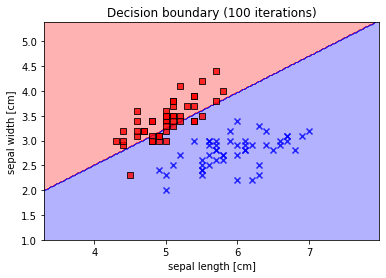

In [10]:
decision_plot_new(X, y, 100)

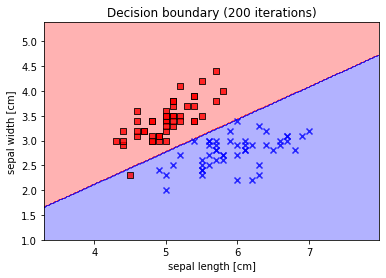

In [11]:
decision_plot_new(X, y, 200)

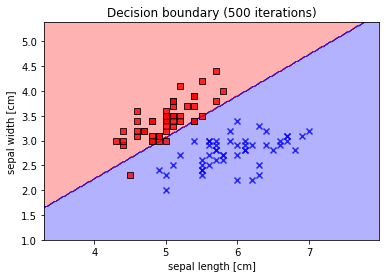

In [12]:
decision_plot_new(X, y, 500)

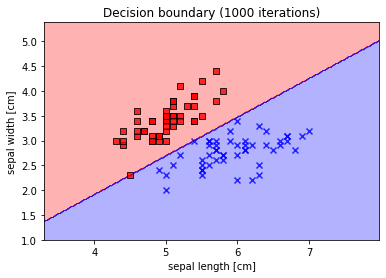

In [13]:
decision_plot_new(X, y, 1000)

# Deliverable: 2.1.3

In [14]:
ppn = Perceptron(n_iter = 1000)
ppn.fit(X, y)

print(ppn.w_)

[-2.50375655  1.58388244 -2.01128172]


$$ \hat{y_i} = 1.584x_1 - 2.011x_2 -2.504 $$

## Implementing Winnow

In [15]:
X = df.iloc[0:100][["sepal_len", "petal_len"]].values

class Winnow(object):
    """Winnow classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter


    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        
        self.w_ = np.ones(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = (target - self.predict(xi))
                if(update > 0):
                    self.w_[1:] *= self.eta * xi
                    self.w_[0] *= self.eta
                elif (update < 0): 
                    self.w_[1:] /= self.eta * xi
                    self.w_[0] /= self.eta
                
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 100.0, 1, -1)


# Deliverable: 3.1.1

Text(0.5, 1.0, 'Number of updates v. Epochs (10 iterations)')

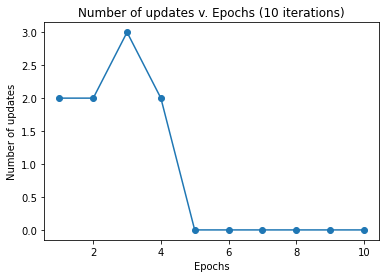

In [16]:
winn = Winnow()
winn.fit(X, y)

plt.plot(range(1, len(winn.errors_) + 1), winn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.title("Number of updates v. Epochs (10 iterations)")

# Deliverable: 3.1.2

Text(0.5, 0, 'sepal length [cm]')

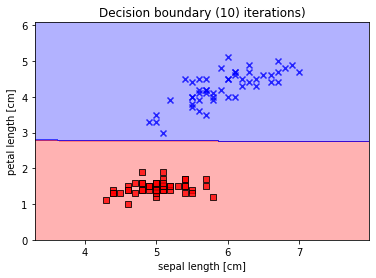

In [17]:
plot_decision_regions(X, y, classifier=winn)
plt.title("Decision boundary (10) iterations)")
plt.ylabel("petal length [cm]")
plt.xlabel("sepal length [cm]")


# Deliverable: 3.1.3

In [18]:
print(winn.w_)

[ 1.          0.31213232 35.20483824]


$$ \hat{y_i} = 0.312x_1 + 35.205x_2 + 1 $$